In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd

# Primeira parte: Determinando a constante de Planck

## Dados coletados

In [38]:
#Comprimento de onda do filtro
wl = np.array([365, 405, 436, 546, 577]) * 1e-9 #m

#Potencial de parada
v_s = np.array([-1.560, -1.157, -0.939, -0.460, -0.332]) #V

#Estamos considerando essa incerteza devido as flutuações que ocorriam na hora da medida
sigma_v_s = np.full(len(v_s), 0.001) #V

## Calculando a frequência a partir do comprimento de onda

$$\nu = \frac{c}{\lambda}$$

In [39]:
c = 299792458 #m/s
f = c/wl

print('Frequência: ', f)

Frequência:  [8.21349200e+14 7.40228291e+14 6.87597381e+14 5.49070436e+14
 5.19570984e+14]


## Gráfico dos dados brutos

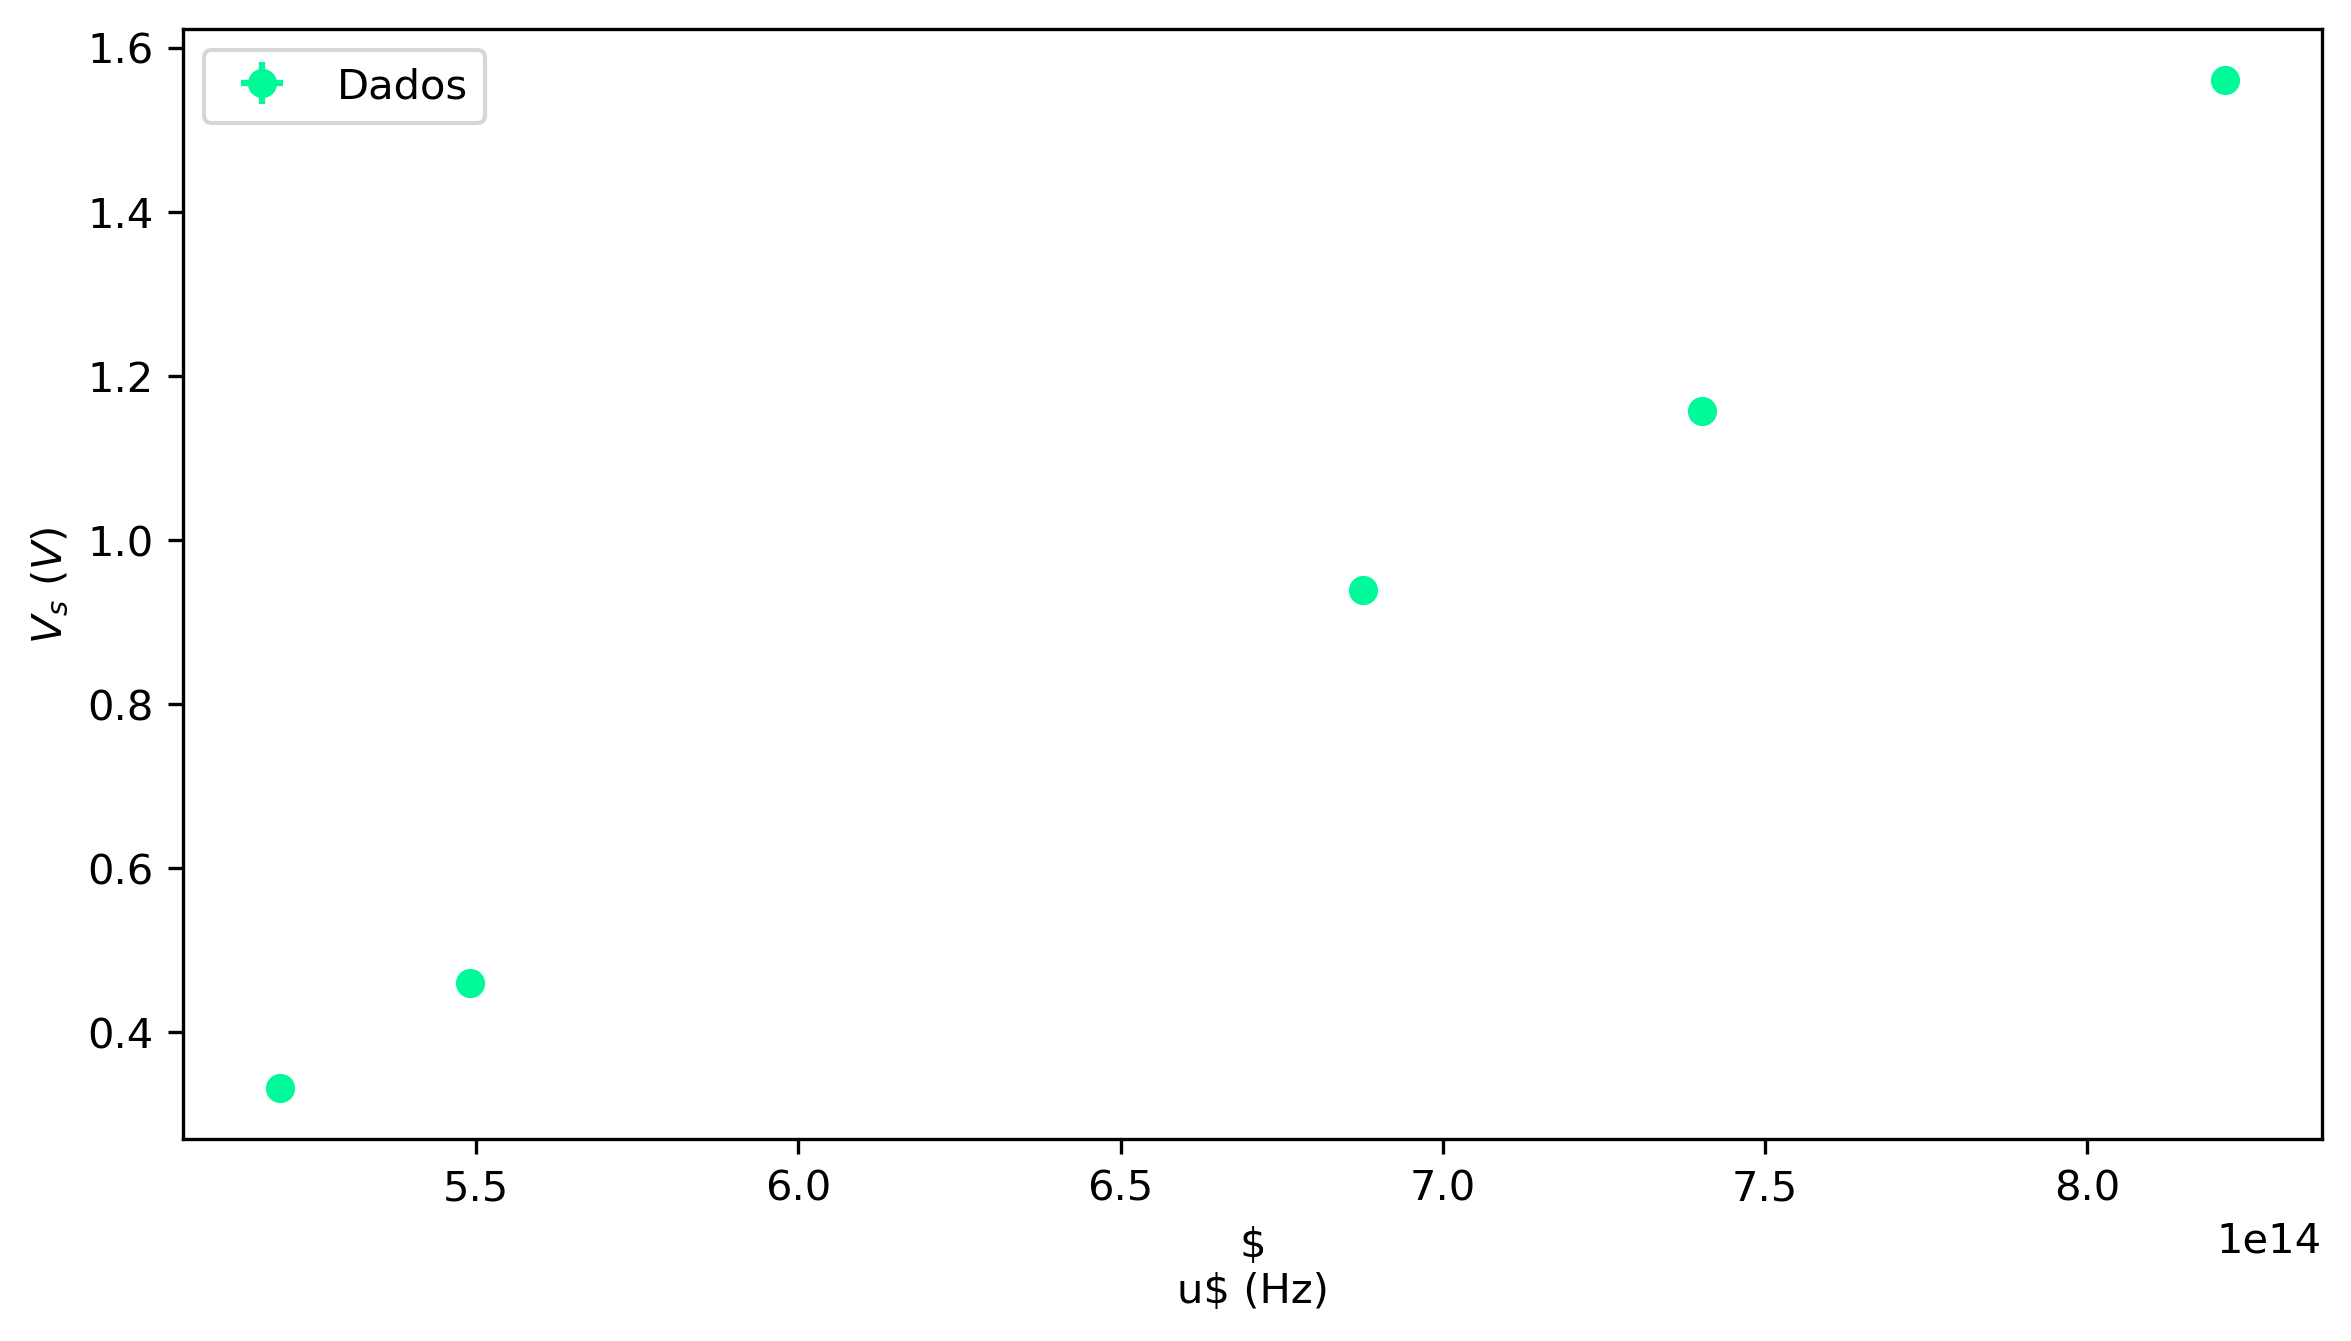

In [40]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(f,abs(v_s),sigma_v_s,0, 'o', color = 'Mediumspringgreen', label = 'Dados')
plt.ylabel('$V_s$ ($V$)')
plt.xlabel('$\nu$ (Hz)')
plt.legend()
plt.show()

## Ajuste linear

In [41]:
fitpars, cov_pars = np.polyfit(f,abs(v_s),1,w=np.power(sigma_v_s,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular = fitpars[0]
coef_linear = fitpars[1]
sigma_angular = np.sqrt(cov_pars[0][0])
sigma_linear = np.sqrt(cov_pars[1][1])

sigma_angular = float('{:g}'.format(float('{:.2g}'.format(sigma_angular))))
sigma_linear = float('{:g}'.format(float('{:.2g}'.format(sigma_linear))))

                     
print('Coeficiente angular: %.17f +- %.17f (m/s)' % (coef_angular ,sigma_angular))
print('Coeficiente linear: %.2f +- %.2f (m)' %(coef_linear,sigma_linear))

Coeficiente angular: 0.00000000000000394 +- 0.00000000000000018 (m/s)
Coeficiente linear: -1.73 +- 0.12 (m)


## Gráfico contendo o ajuste linear

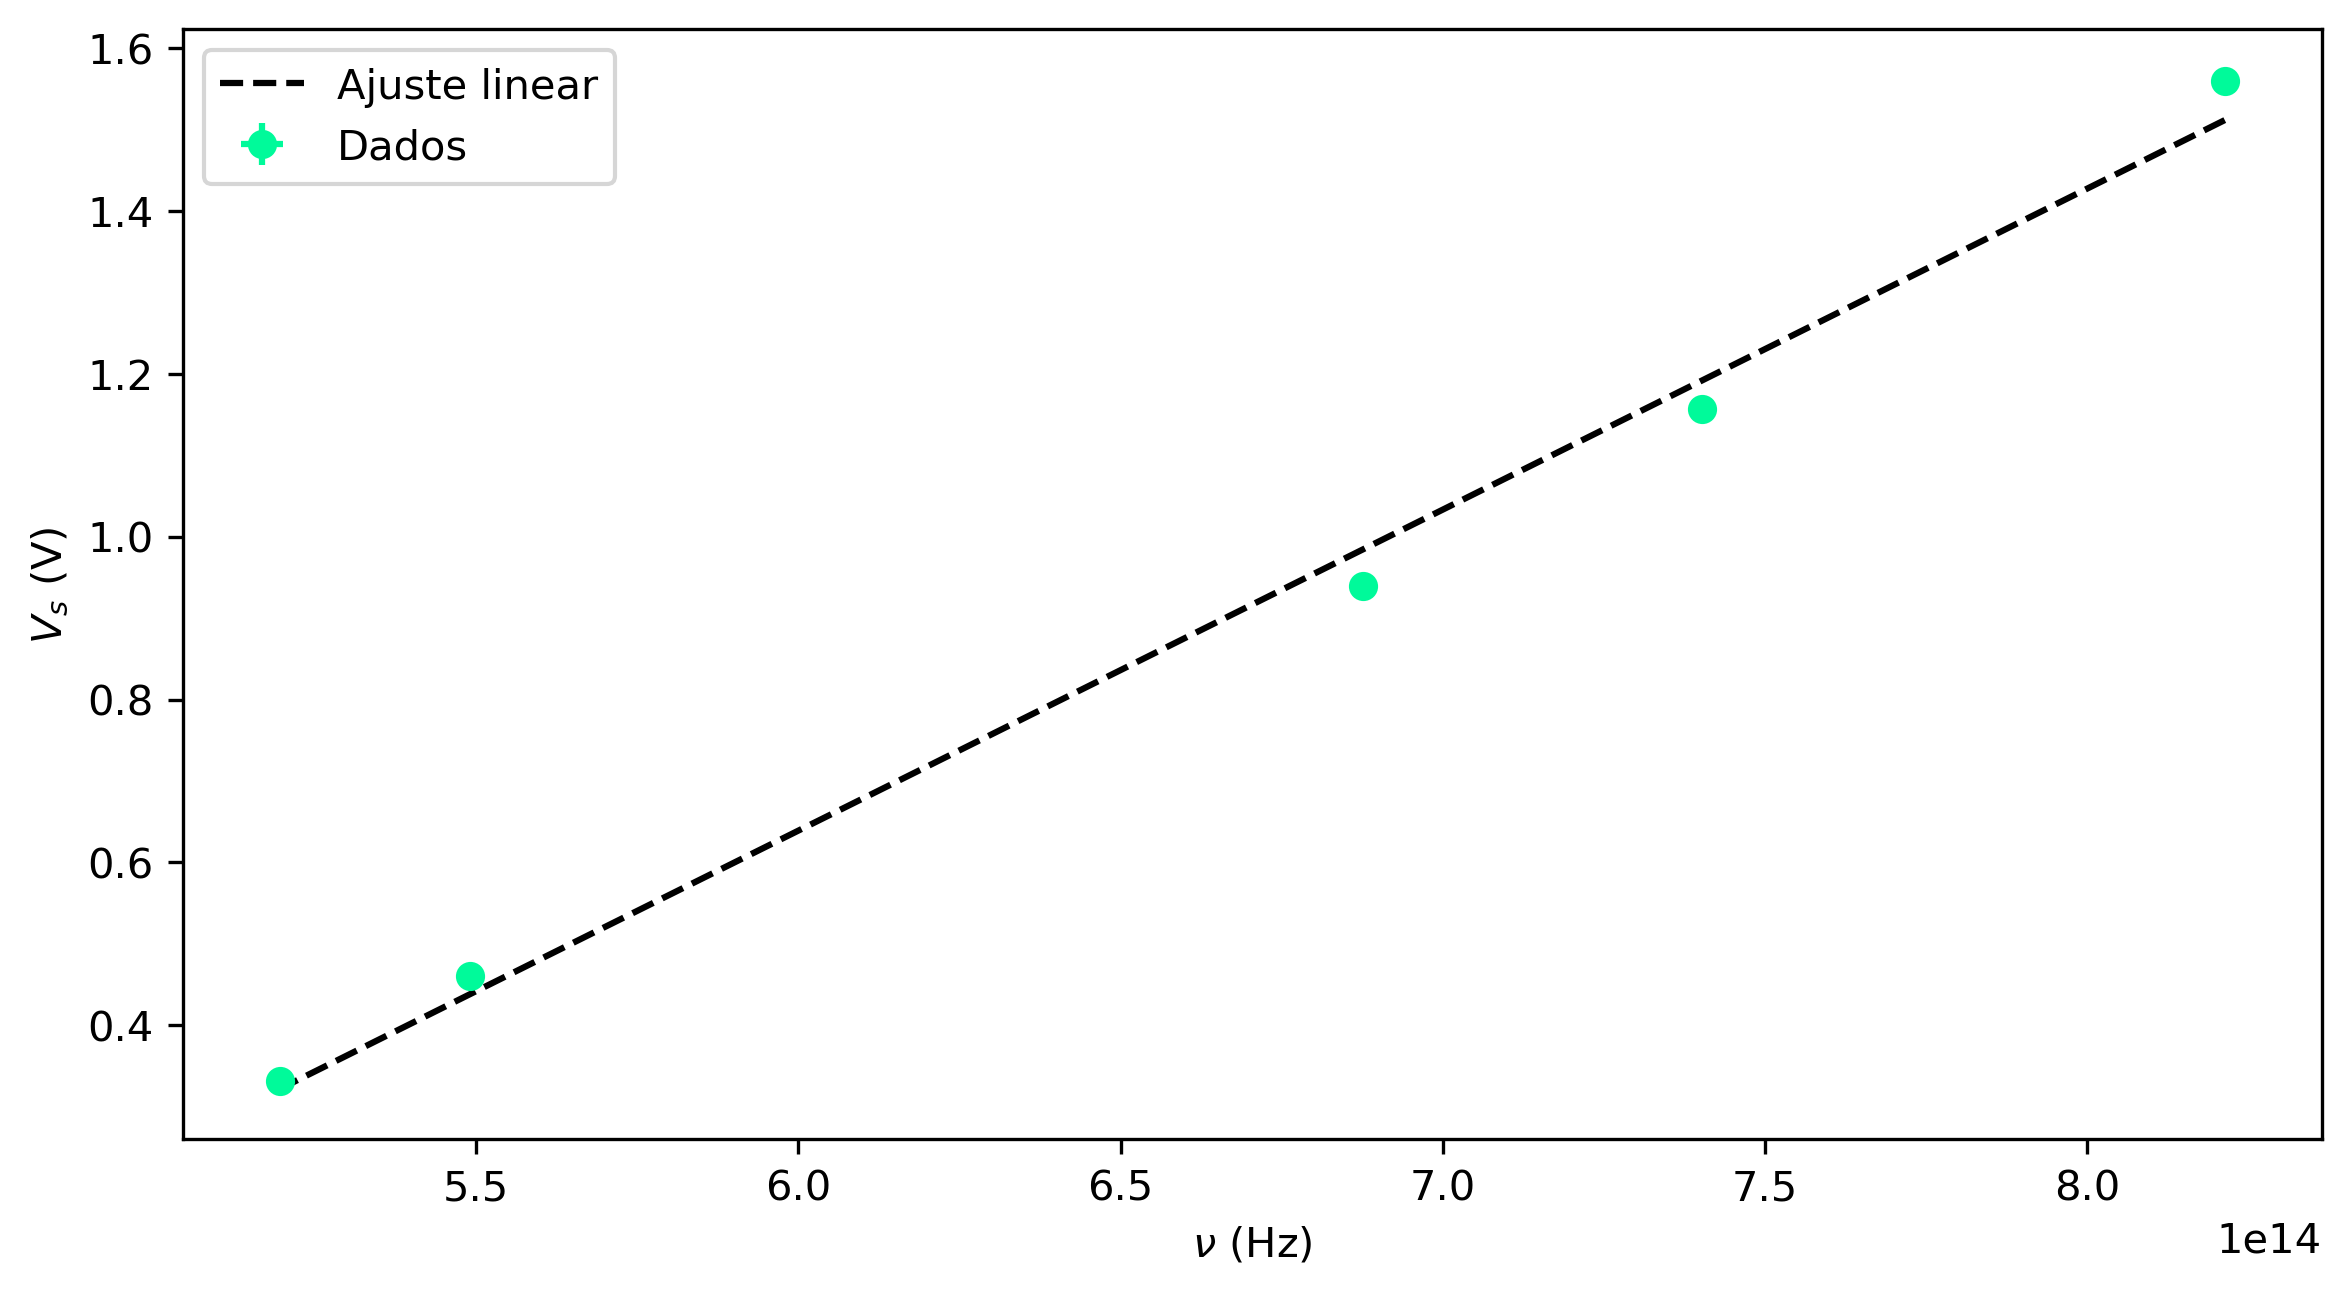

In [44]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(f,abs(v_s),sigma_v_s,0, 'o', color = 'Mediumspringgreen', label = 'Dados')
plt.plot(f,f*coef_angular + coef_linear, color ='black', ls = '--', label = r'Ajuste linear')
plt.ylabel(r'$V_s$ (V)')
plt.xlabel(r'$\nu$ (Hz)')
plt.legend()
plt.show()

## Determinando a constante de Planck

Nós sabemos que o modelo teórico para o efeito fotoelétrico é:

$$V_s = \frac{h}{e} \nu + \frac{\Phi_0}{e}$$

Comparando com o ajuste obtido ($V_s = c_a \nu - c_l $), nós vemos que:

$$\frac{h}{e} = c_a \implies h = c_a \ e$$
$$\frac{\Phi_0}{e} = c_l \implies \Phi_0 = c_l \ e$$

Neste experimento queremos encontrar o valor da constante de Planck, por isso focaremos na primeira equação. Para obtermos o erro associado a $h$, podemos propagar a incerteza de $c_a$ da seguinte forma:

$$\sigma_{h} = \sqrt{\left(\frac{\partial h}{\partial c_a}\right)^2\sigma_{c_a}^2}$$

$$\sigma_{h} = \sqrt{\left(\frac{\partial c_a \ e}{\partial c_a}\right)^2\sigma_{c_a}^2}$$
$$\sigma_{h} = \sqrt{e^2\sigma_{c_a}^2}$$
$$\sigma_{h} = e \ \sigma_{c_a}$$

In [49]:
e = 1.602e-19

#Calculando h
h = coef_angular*e

#Calculando a incerteza de h e arredondando para dois algarismos significativos
sigma_h = e*sigma_angular
sigma_h = float('{:g}'.format(float('{:.2g}'.format(sigma_h))))

#Exibindo o resultado
print('h = (%.2f +- %.2f) 10^{-34} (J s)' % (h/1e-34,sigma_h/1e-34))

h = (6.31 +- 0.29) 10^{-34} (J s)


In [53]:
print('desvio =', 1 - h/6.626e-34)

desvio = 0.04711327380771002


# Segunda parte do experimento

## Dados coletados